In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

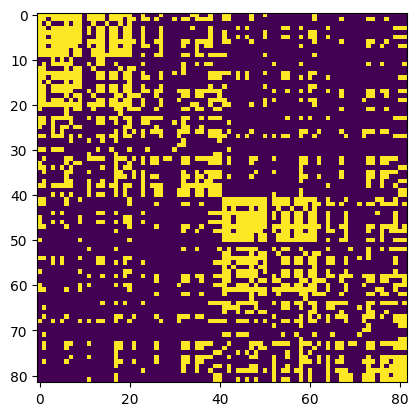

In [47]:
structural = np.loadtxt("/neurospin/lbi/monkeyfmri/deepstim/database/ANESTHETIC_database/derivatives/reference_kmeans/inputs/structural.txt")
plt.imshow(structural > 2)

In [6]:
mine = True

if not mine :
    timeseries = np.load("/neurospin/lbi/monkeyfmri/deepstim/database/ANESTHETIC_database/derivatives/nsm_timeseries/cocomac/timeseries.npy")
    meta = pd.read_csv("/neurospin/lbi/monkeyfmri/deepstim/database/ANESTHETIC_database/derivatives/reference_kmeans/inputs/metadata.tsv", sep="\t")
    id_sessions_awake = np.array([i for i in range(len(meta)//464) if meta["condition"].iloc[i*464] in ["awake"]])
    id_sessions_light_propofol = np.array([i for i in range(len(meta)//464) if meta["condition"].iloc[i*464] in ["light-propofol"] and meta["monkey"].iloc[i*464]])
    id_sessions_deep_propofol = np.array([i for i in range(len(meta)//464) if meta["condition"].iloc[i*464] in ["deep-propofol"] and meta["monkey"].iloc[i*464]])
    id_sessions_ketamine = np.array([i for i in range(len(meta)//464) if meta["condition"].iloc[i*464] in ["ketamine"]])
    id_sessions_light_sevoflurane = np.array([i for i in range(len(meta)//464) if meta["condition"].iloc[i*464] in ["light-sevoflurane"] and meta["monkey"].iloc[i*464]])
    id_sessions_deep_sevoflurane = np.array([i for i in range(len(meta)//464) if meta["condition"].iloc[i*464] in ["deep-sevoflurane"] and meta["monkey"].iloc[i*464]])
else:
    timeseries = np.load("/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/data/DFCs/0.03-0.11-addcompor-False/timeseries_04-08.npy")
    meta = pd.read_csv("/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/data/DFCs/0.03-0.11-addcompor-False/meta_04-08.csv", sep=",")
    id_sessions_awake = np.array([i for i in range(len(meta)) if meta["condition"].iloc[i] in ["awake"]])
    id_sessions_light_propofol = np.array([i for i in range(len(meta)) if meta["condition"].iloc[i] in ["light-propofol"] and meta["monkey"].iloc[i]])
    id_sessions_deep_propofol = np.array([i for i in range(len(meta)) if meta["condition"].iloc[i] in ["deep-propofol"] and meta["monkey"].iloc[i]])
    id_sessions_light_propofol = np.array([i for i in range(len(meta)) if meta["condition"].iloc[i] in ["light-propofol"] and meta["monkey"].iloc[i]])
    id_sessions_ketamine = np.array([i for i in range(len(meta)) if meta["condition"].iloc[i] in ["ketamine"] and meta["monkey"].iloc[i]])
    id_sessions_sevoflurane2 = np.array([i for i in range(len(meta)) if meta["condition"].iloc[i] in ["sevoflurane2"] and meta["monkey"].iloc[i]])
    id_sessions_sevoflurane4 = np.array([i for i in range(len(meta)) if meta["condition"].iloc[i] in ["sevoflurane4"] and meta["monkey"].iloc[i]])

In [12]:
meta[(meta["monkey"] == "rana") & (meta["ses"] == 20110722) & (meta["run"] == 5)]

Unnamed: 0 monkey       ses  run      condition
100         100   rana  20110722    5  deep-propofol

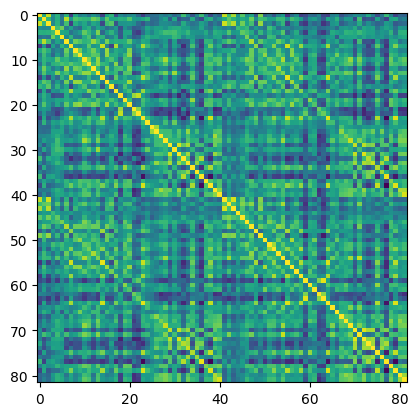

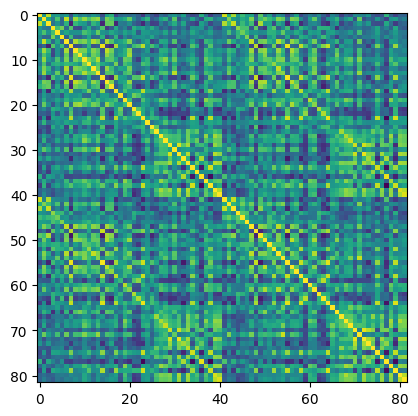

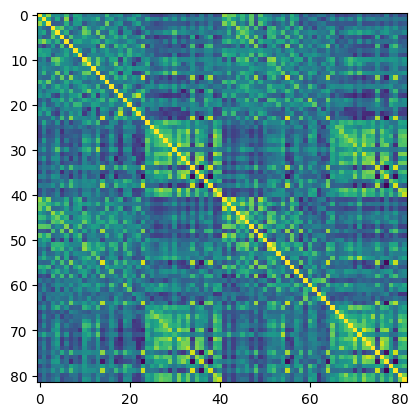

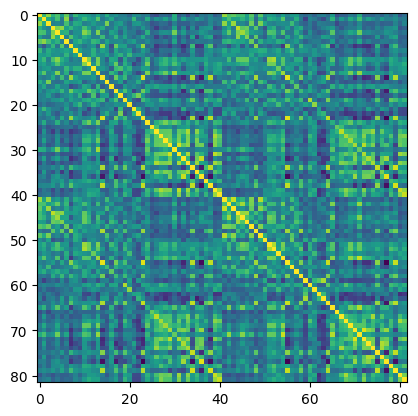

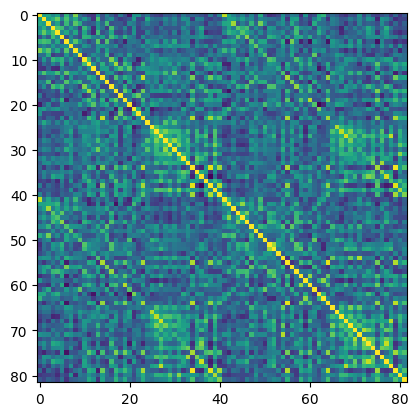

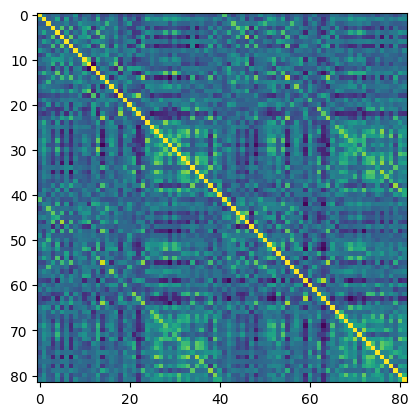

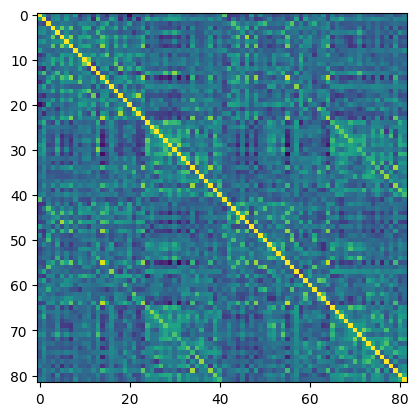

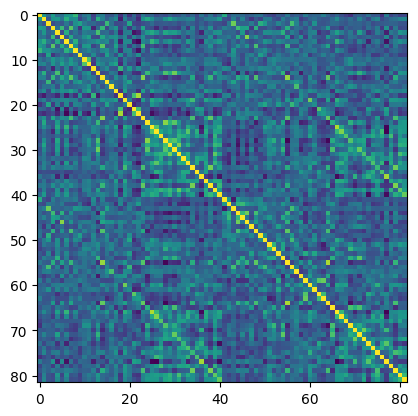

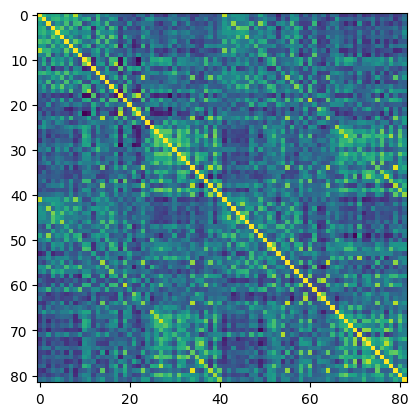

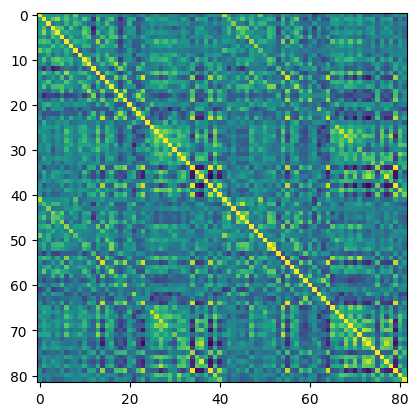

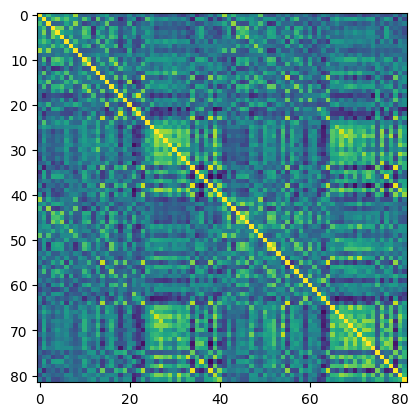

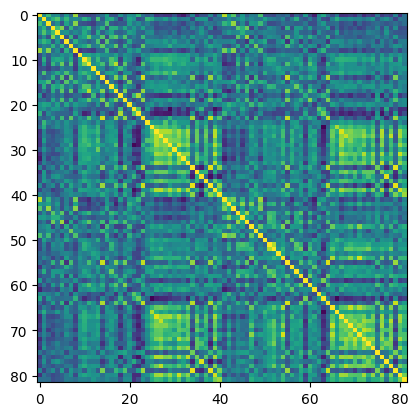

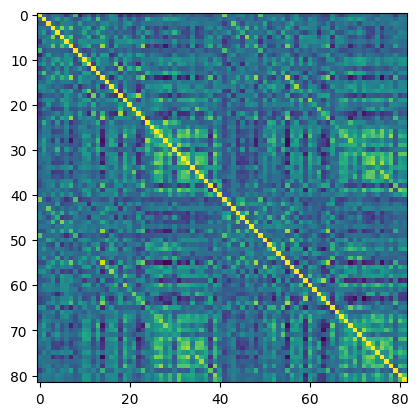

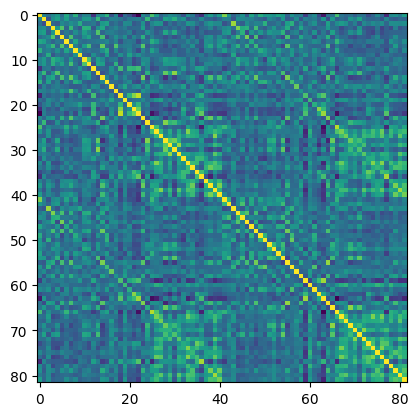

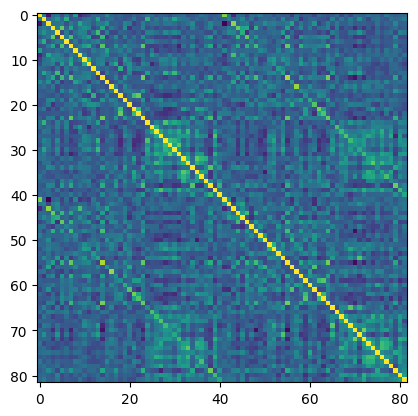

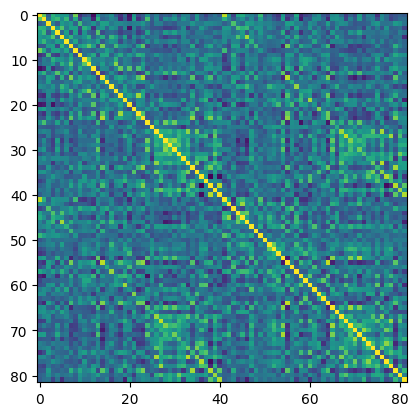

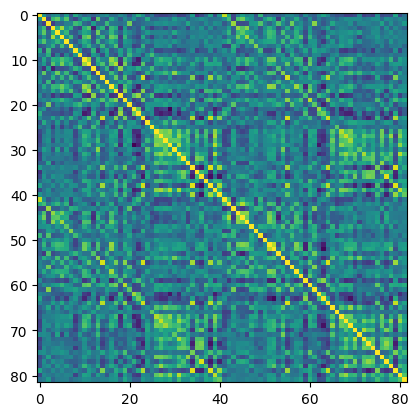

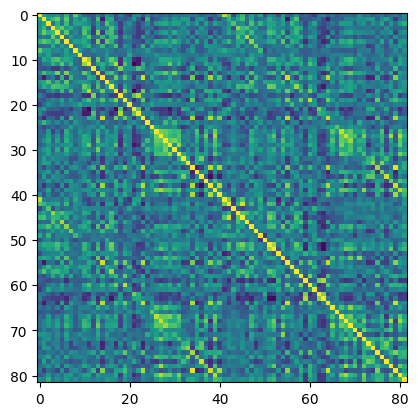

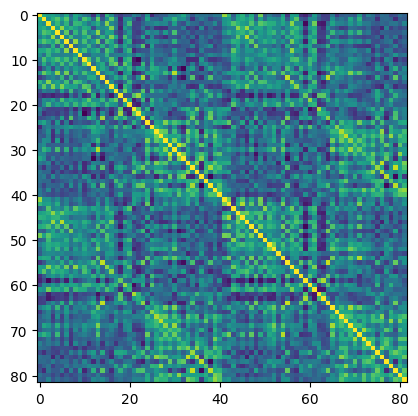

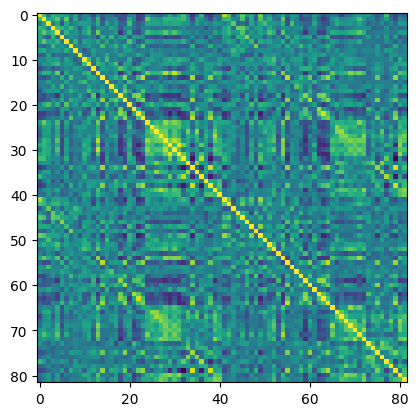

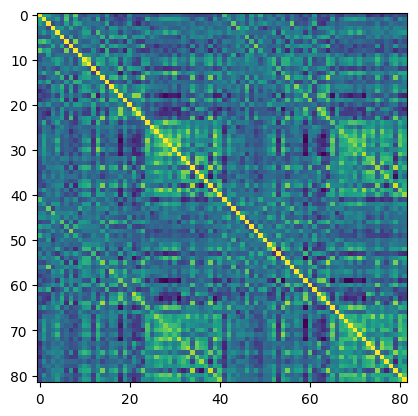

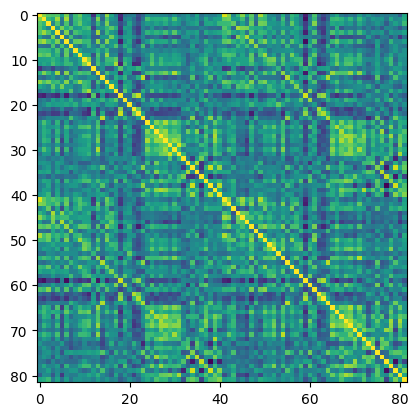

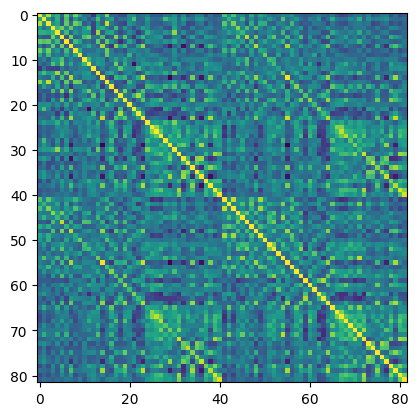

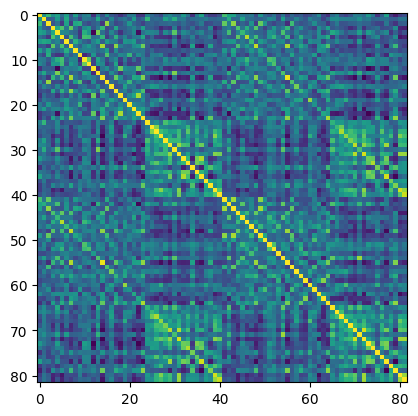

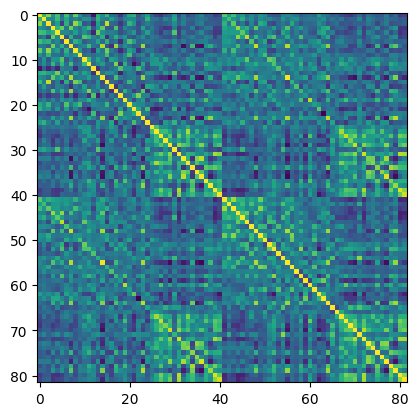

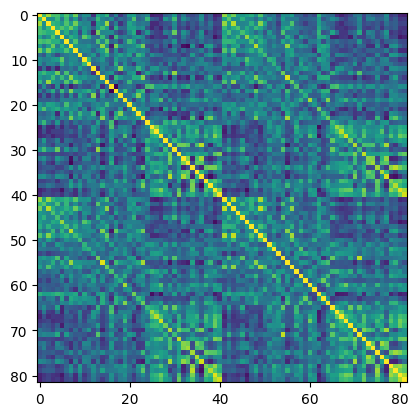

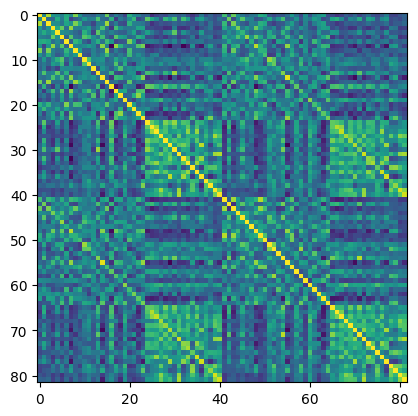

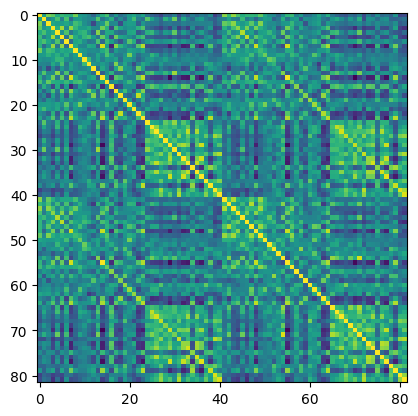

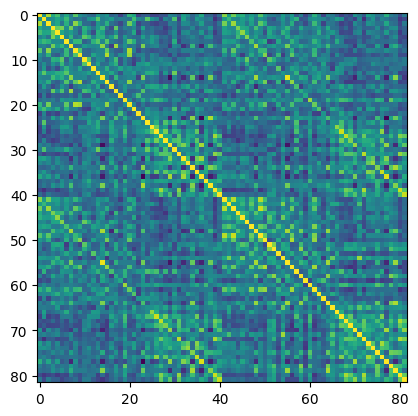

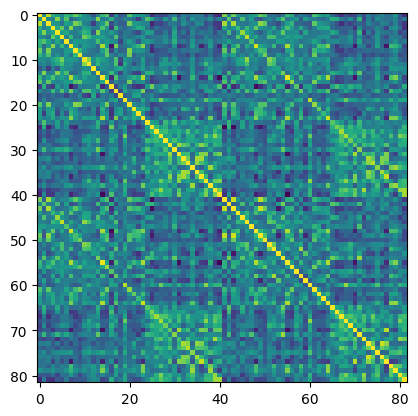

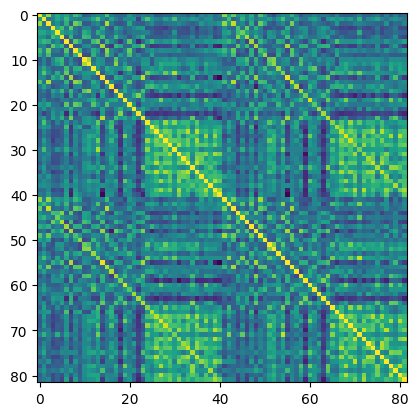

In [7]:
for id in id_sessions_awake:
    accu = np.corrcoef(np.swapaxes(timeseries[id,:,:],0,1))
    plt.imshow(accu)
    plt.show()

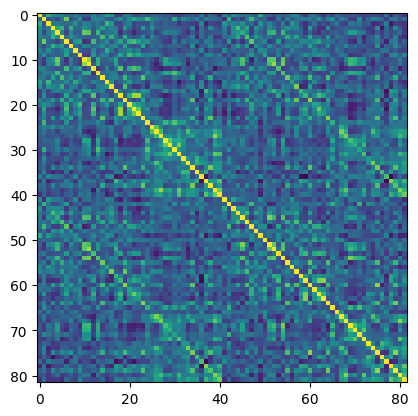

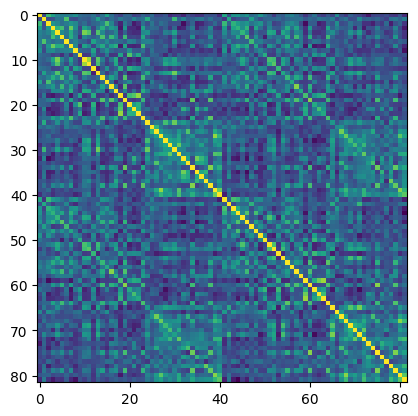

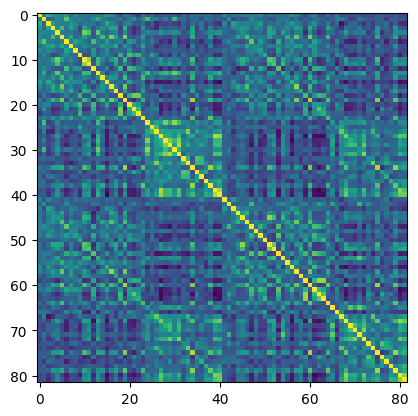

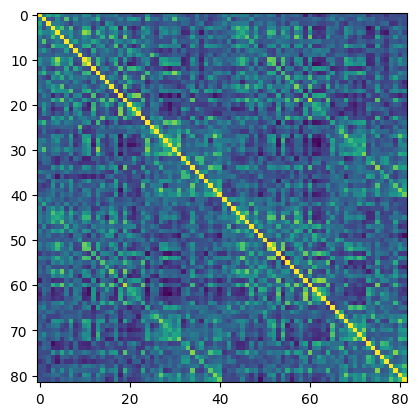

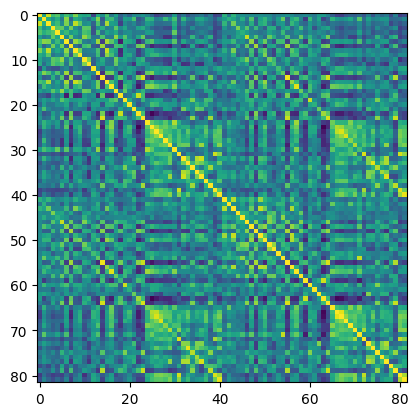

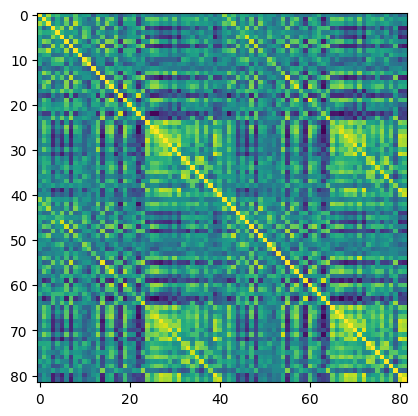

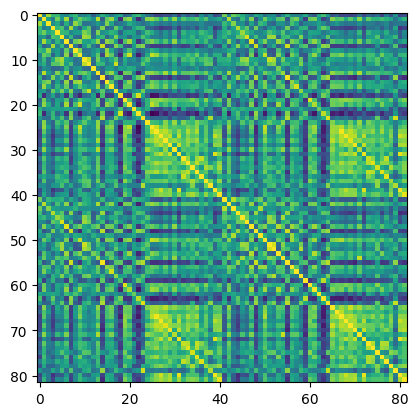

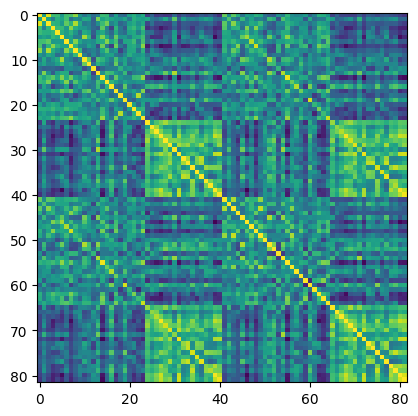

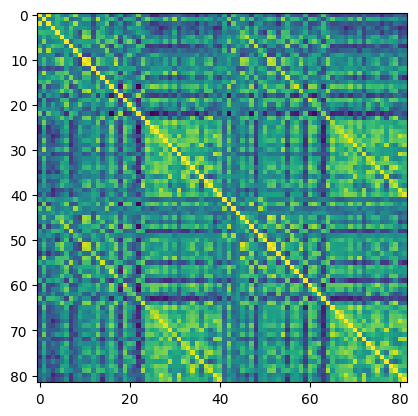

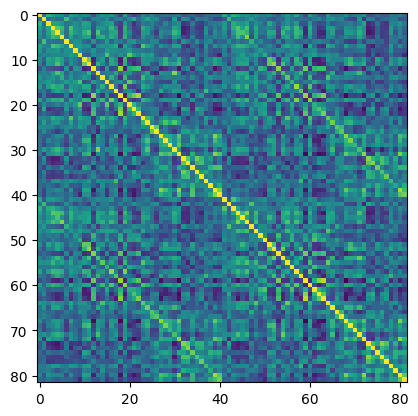

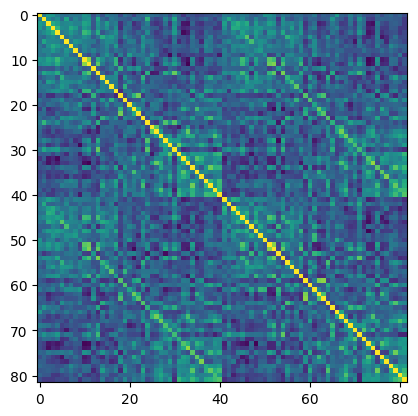

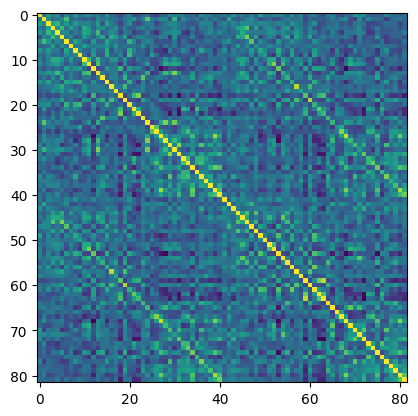

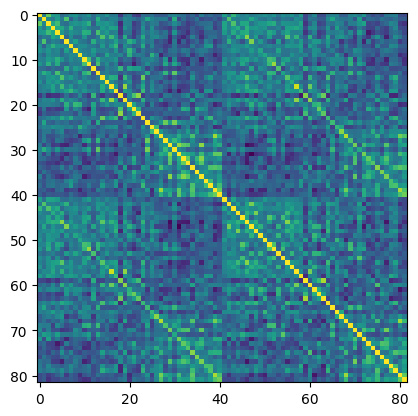

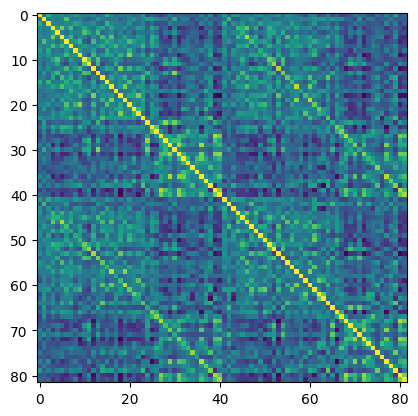

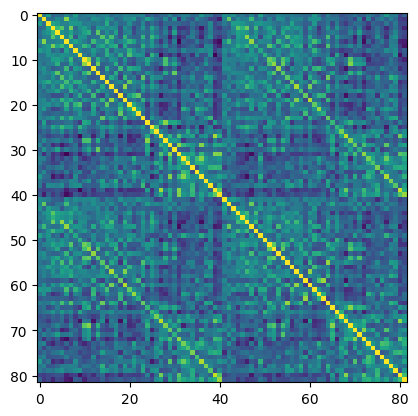

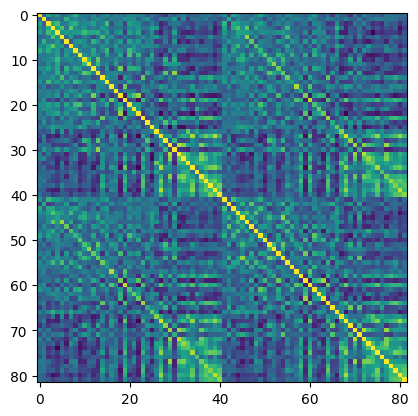

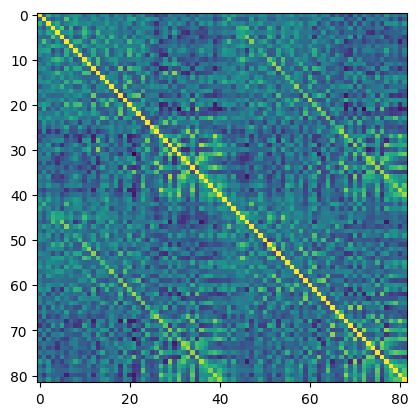

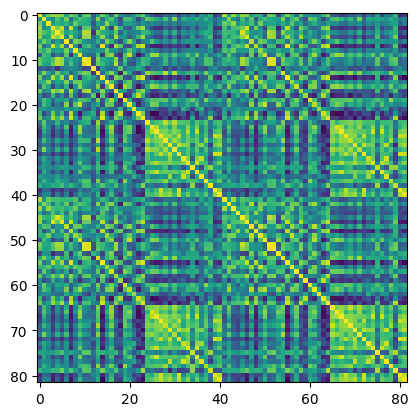

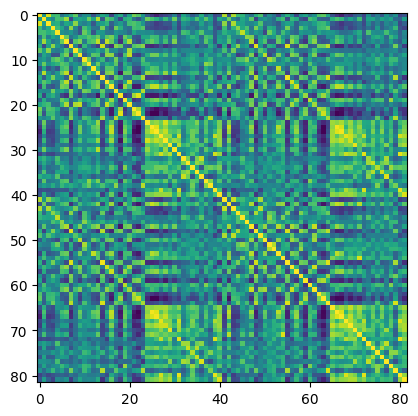

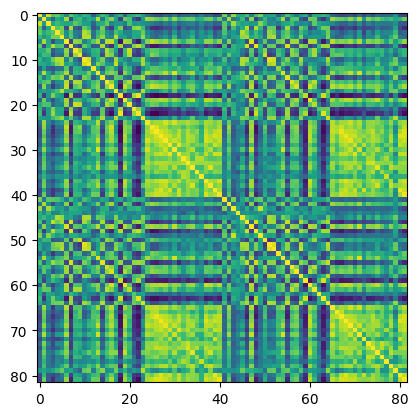

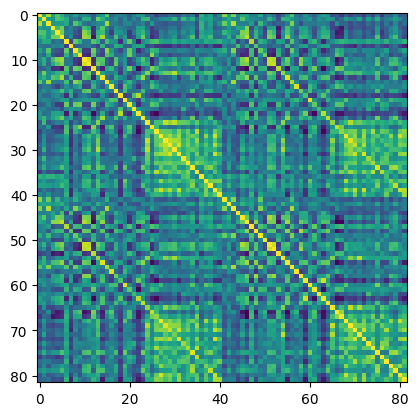

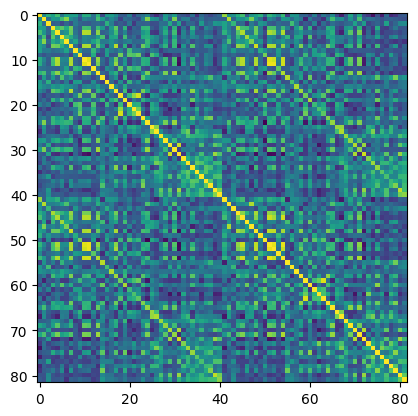

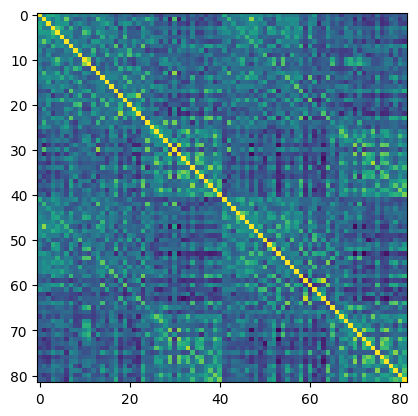

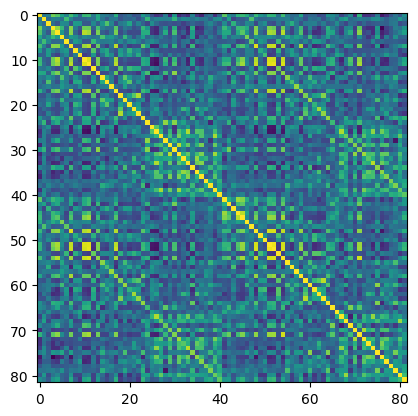

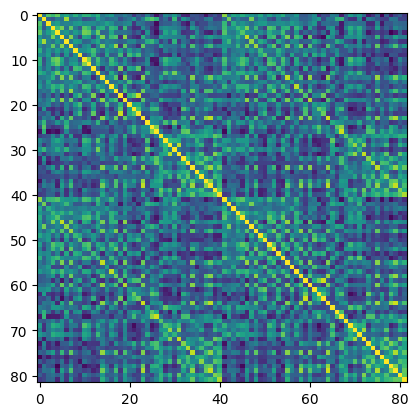

In [5]:
for id in id_sessions_light_propofol:
    accu = np.corrcoef(np.swapaxes(timeseries[id,:,:],0,1))
    plt.imshow(accu)
    plt.show()

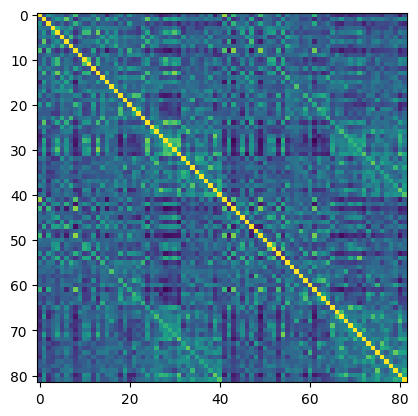

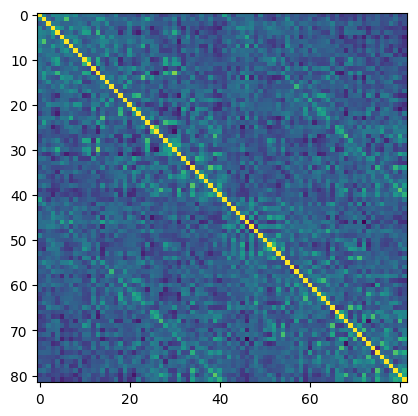

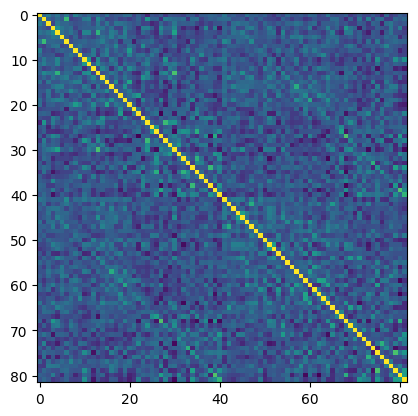

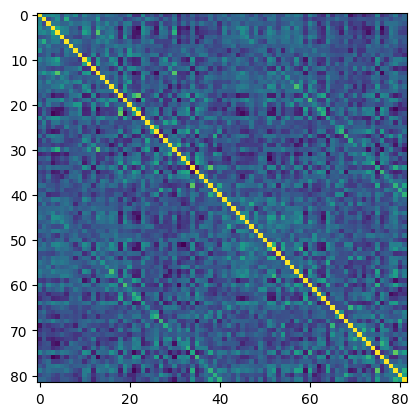

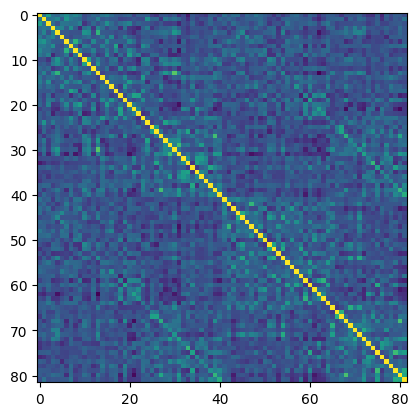

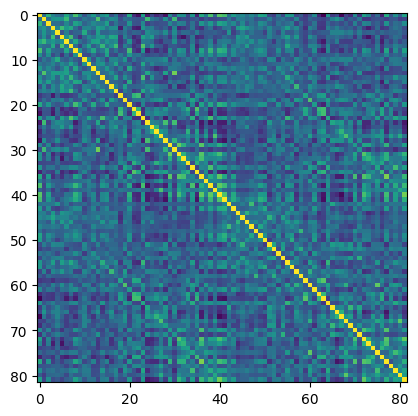

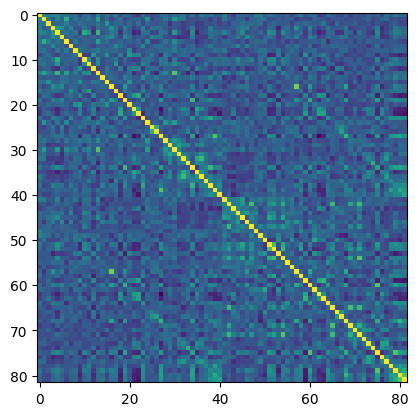

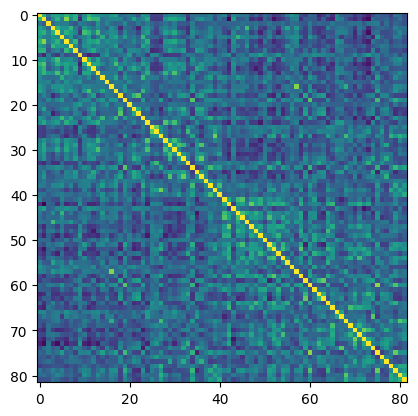

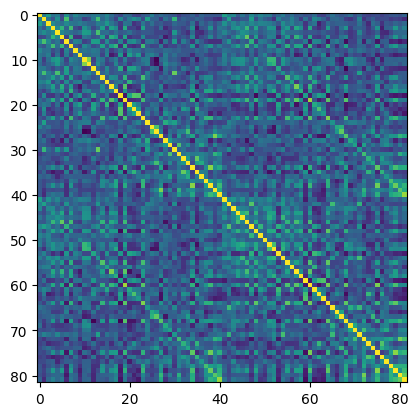

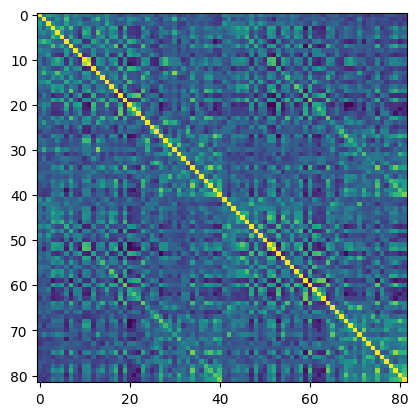

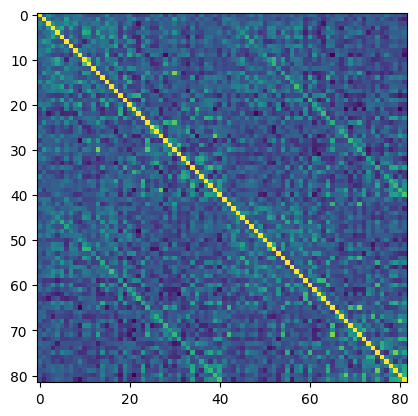

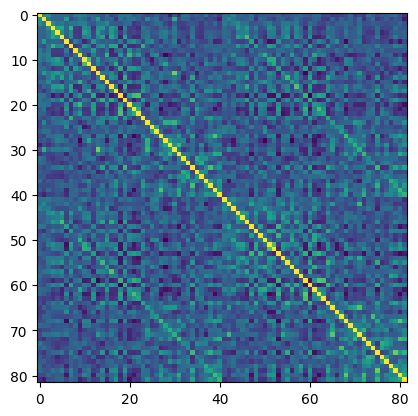

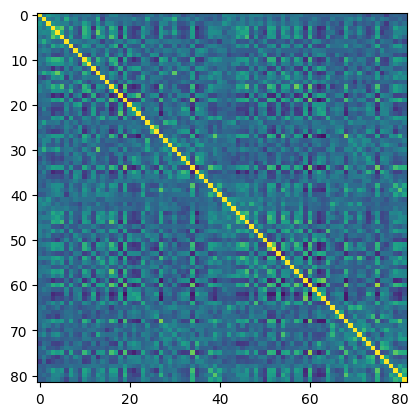

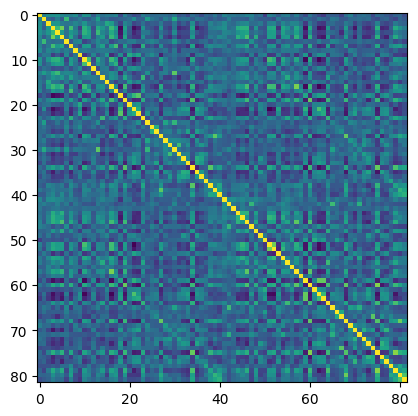

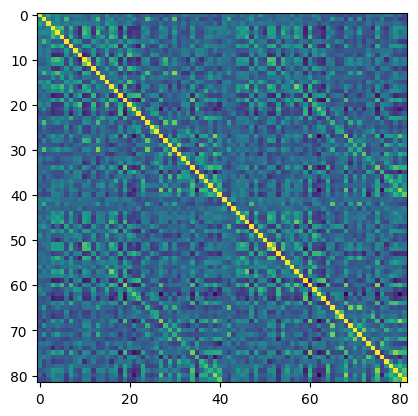

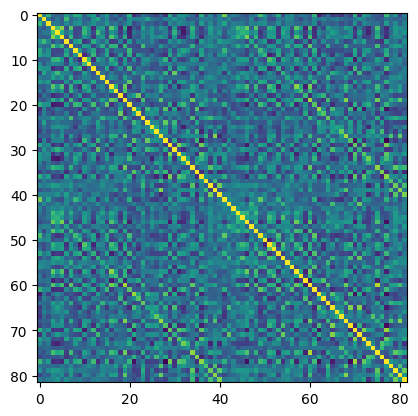

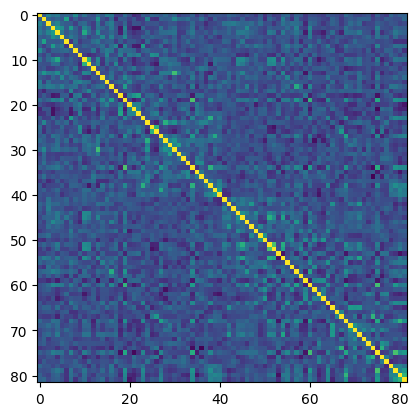

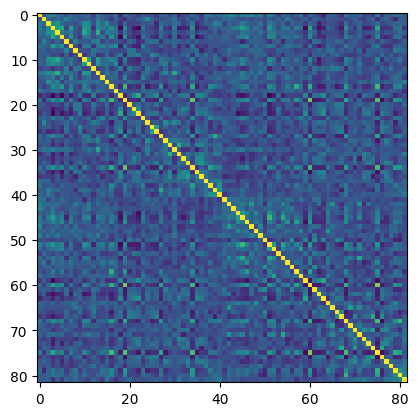

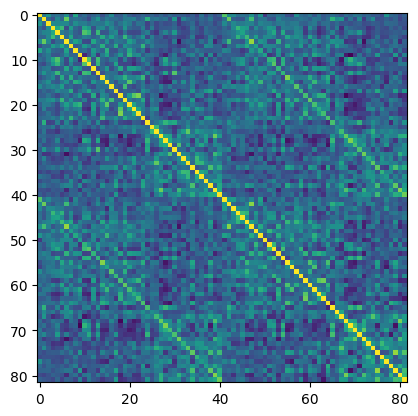

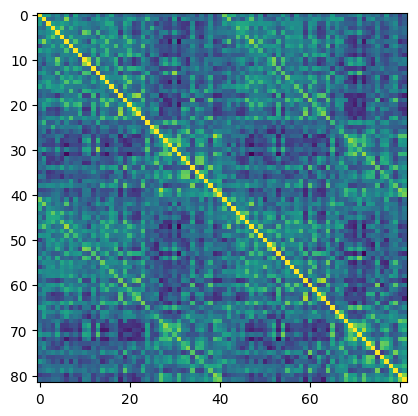

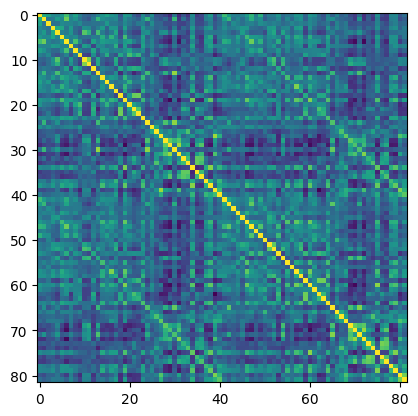

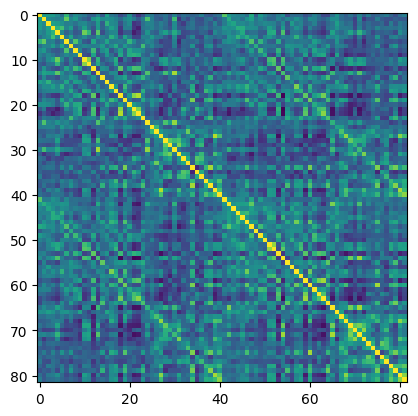

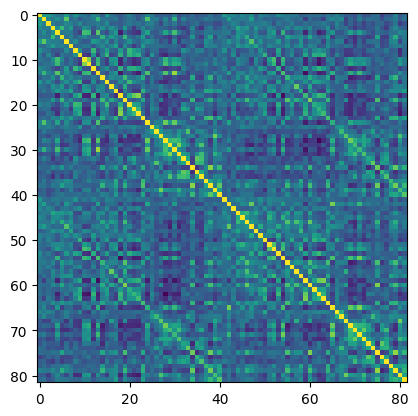

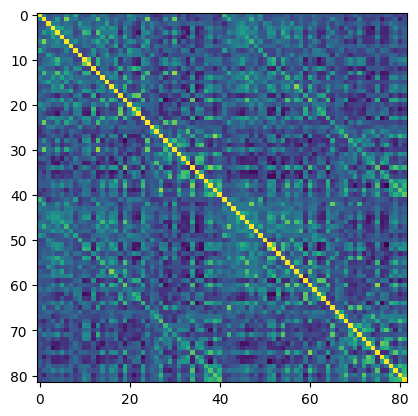

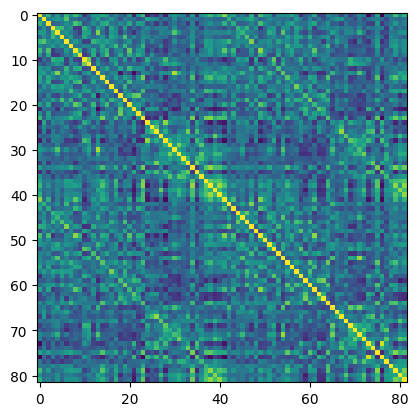

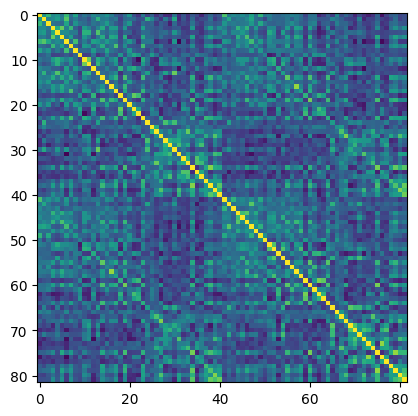

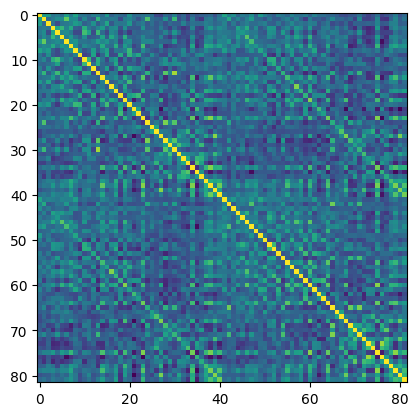

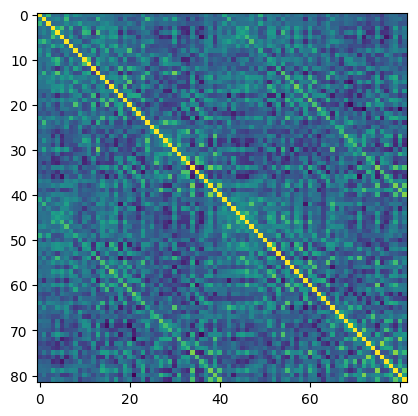

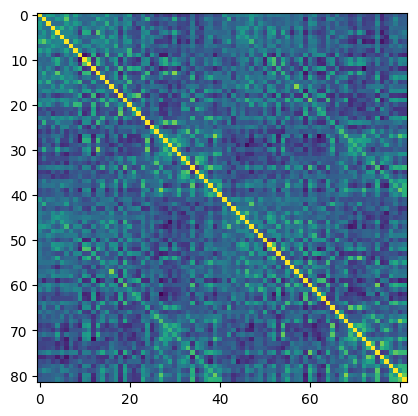

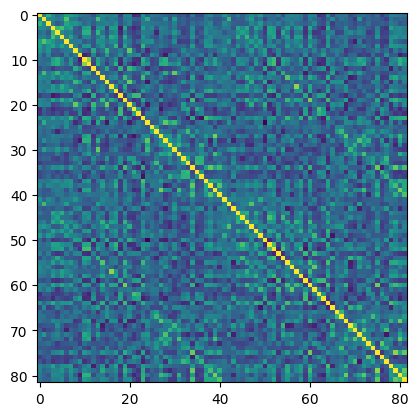

In [8]:
for id in id_sessions_deep_propofol:
    accu = np.corrcoef(np.swapaxes(timeseries[id,:,:],0,1))
    plt.imshow(accu)
    plt.show()

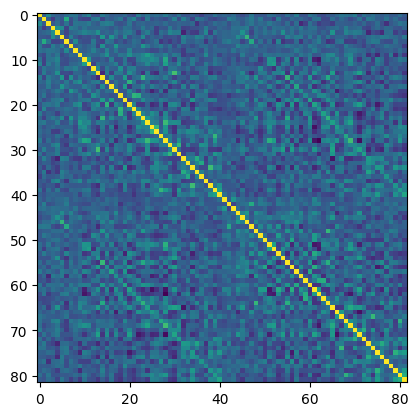

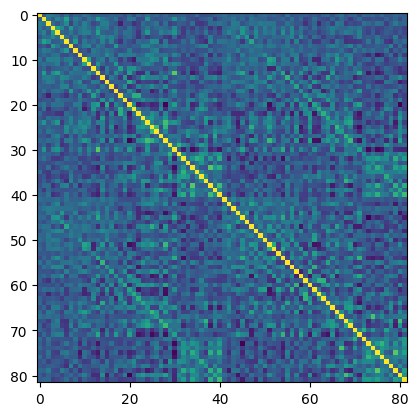

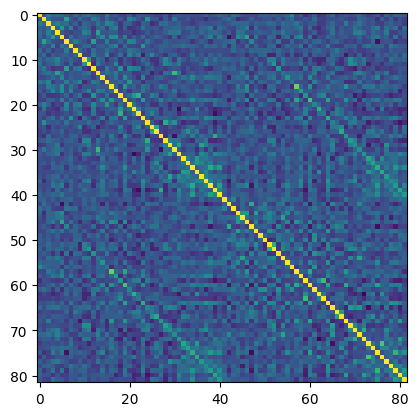

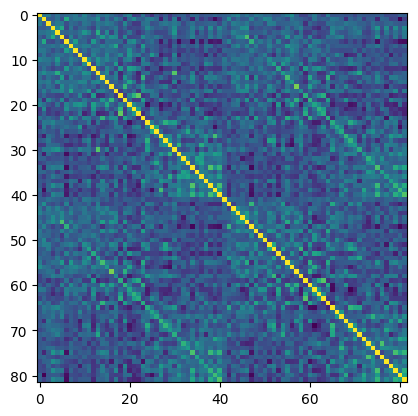

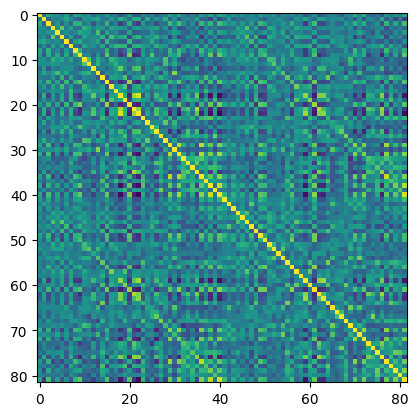

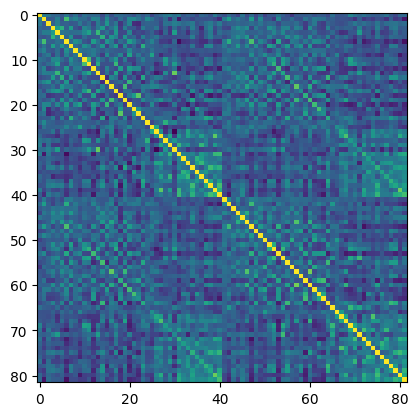

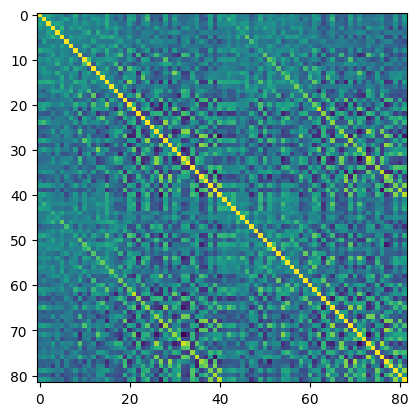

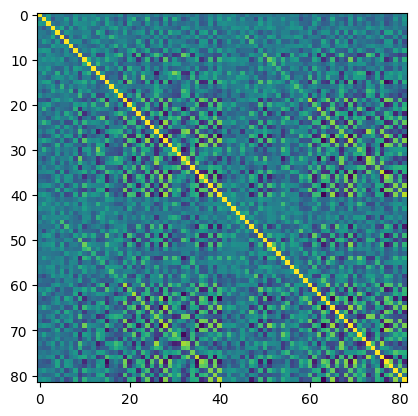

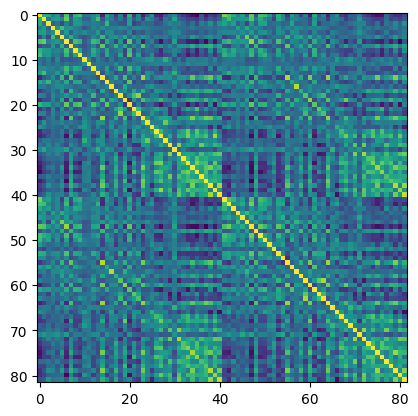

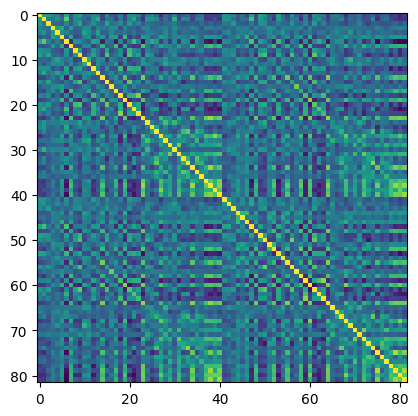

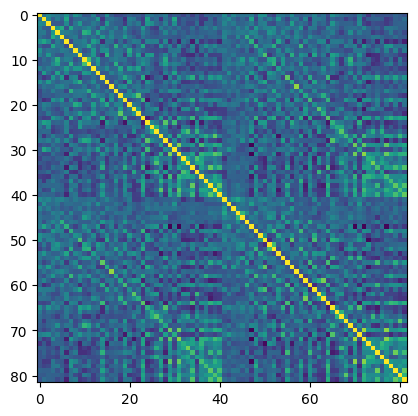

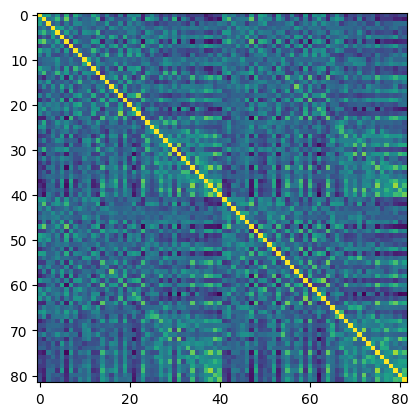

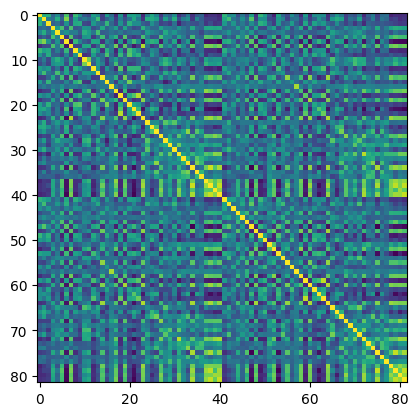

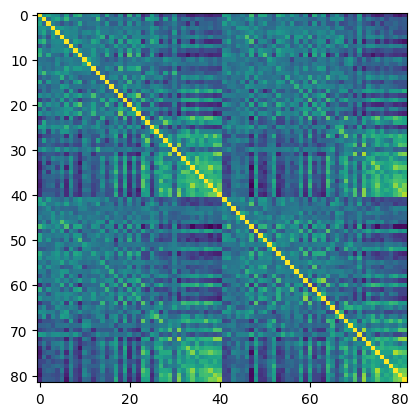

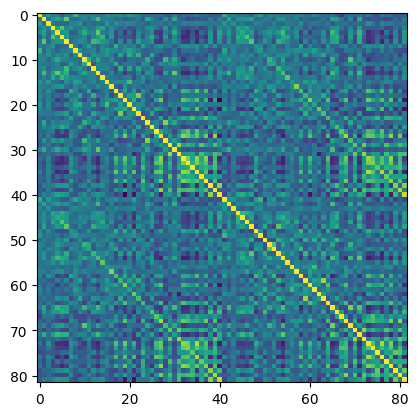

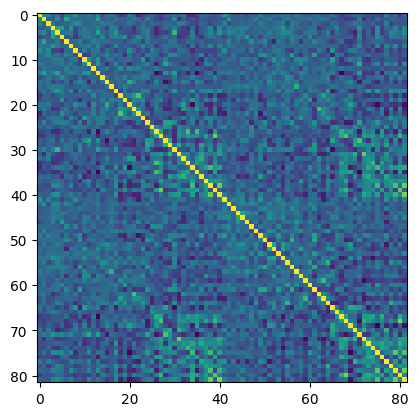

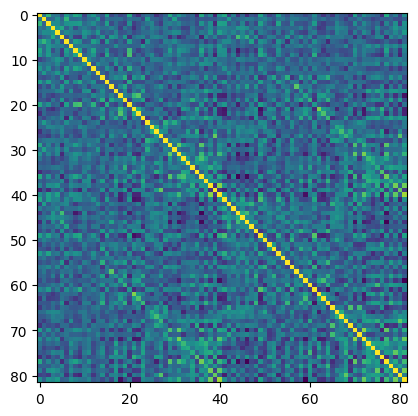

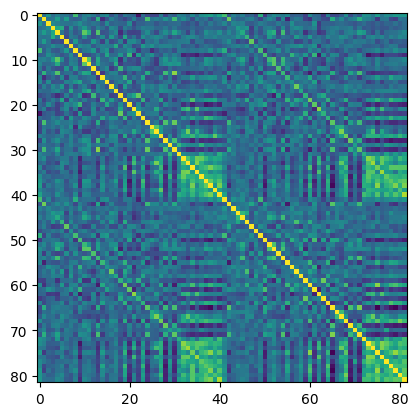

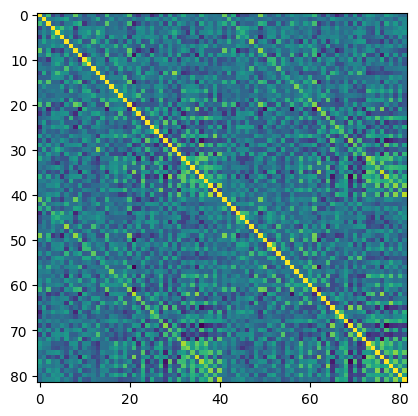

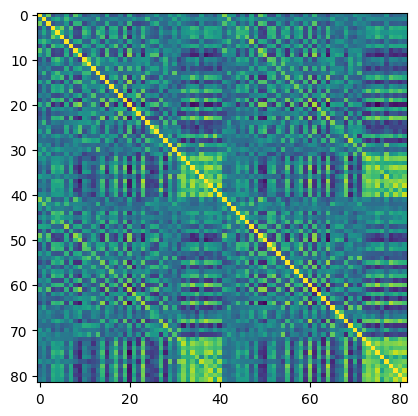

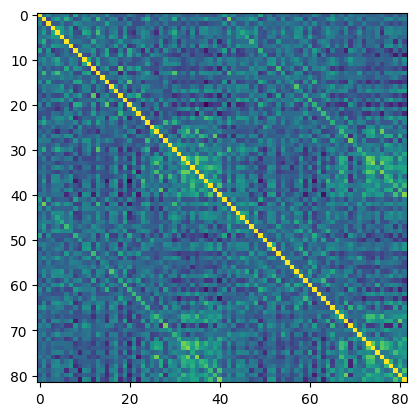

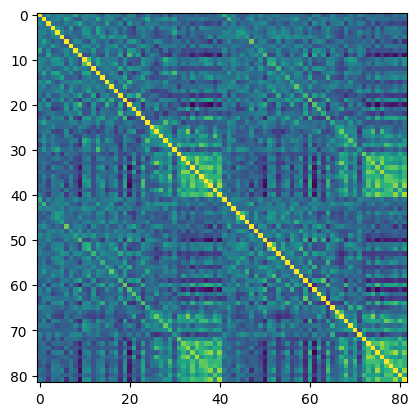

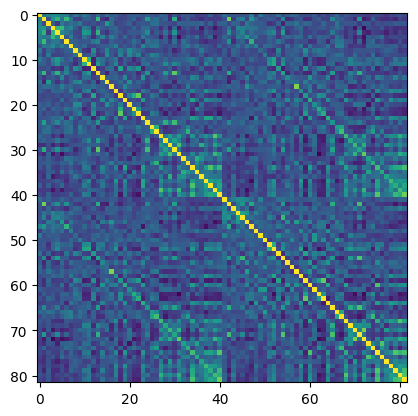

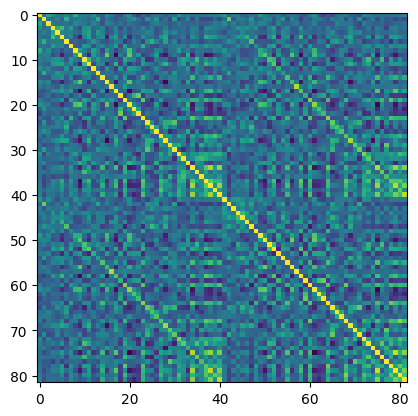

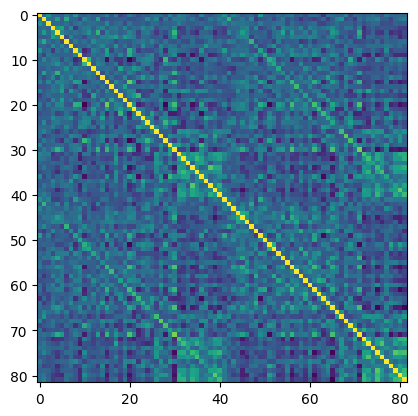

In [58]:
for id in id_sessions_ketamine:
    accu = np.corrcoef(np.swapaxes(timeseries[id,:,:],0,1))
    plt.imshow(accu)
    plt.show()

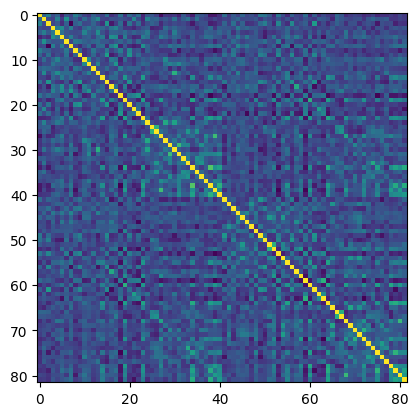

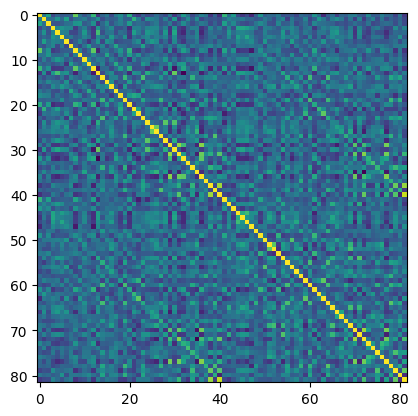

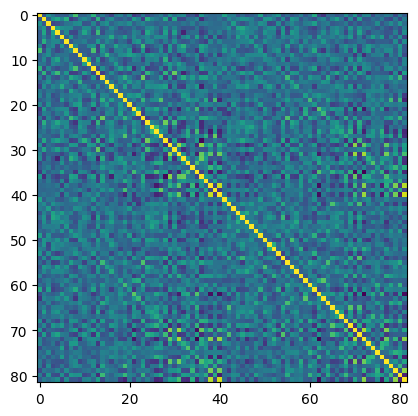

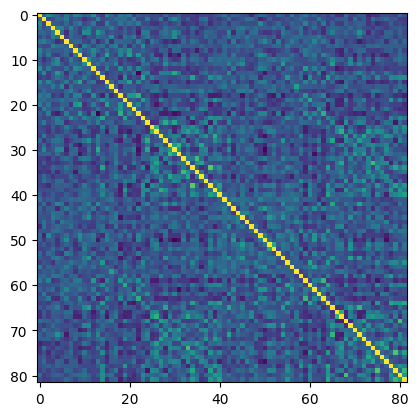

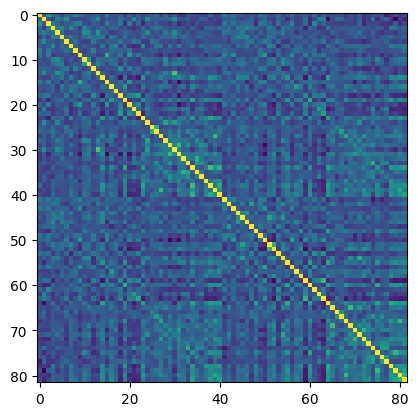

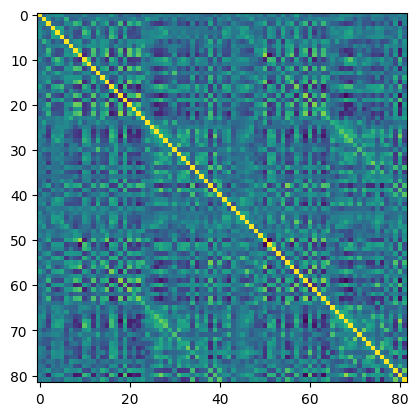

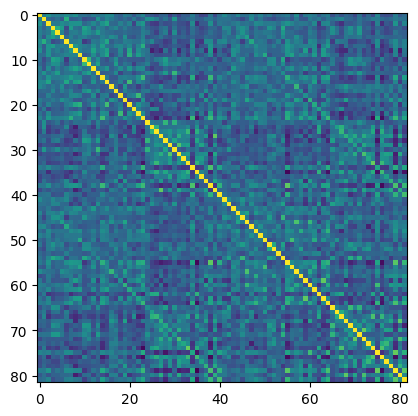

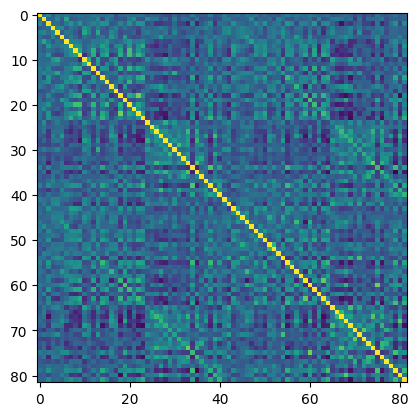

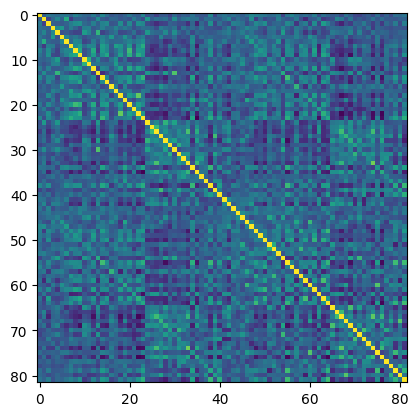

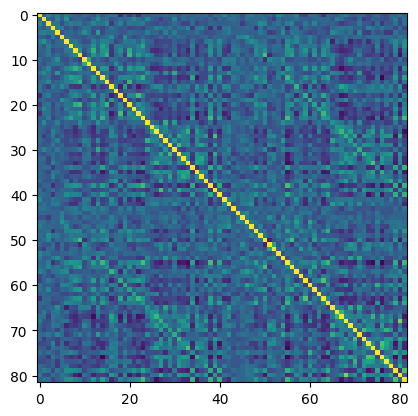

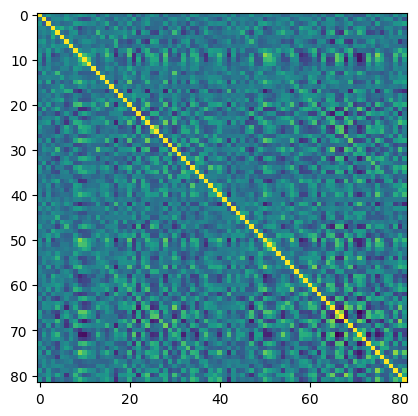

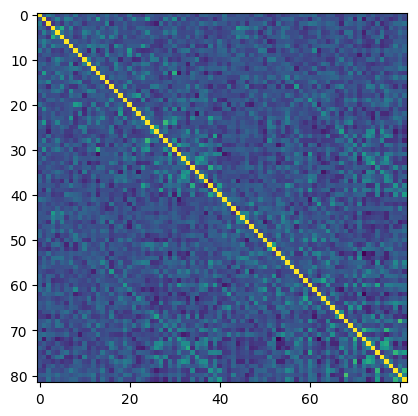

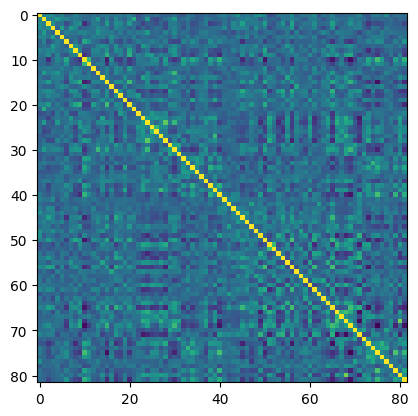

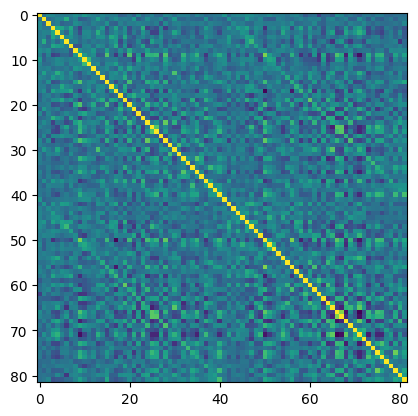

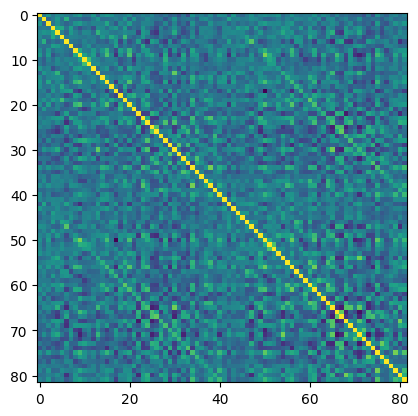

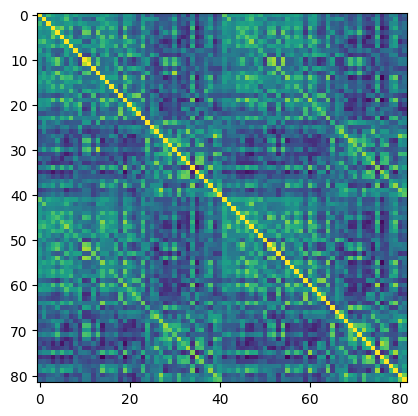

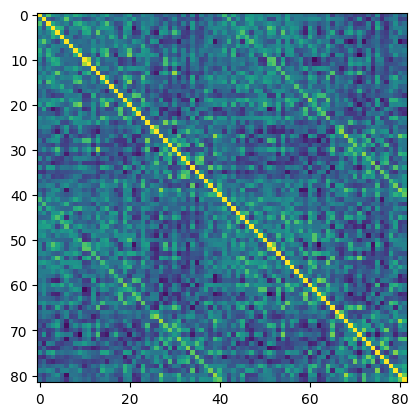

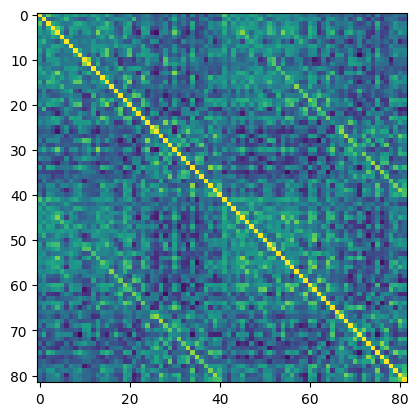

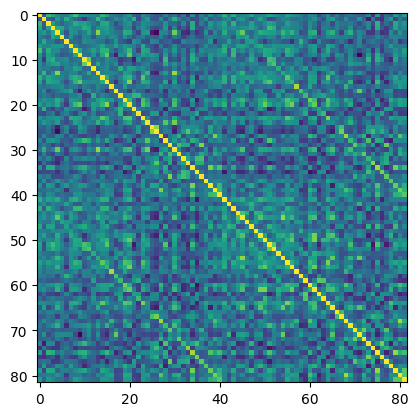

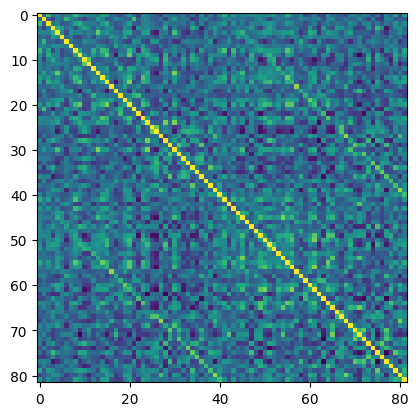

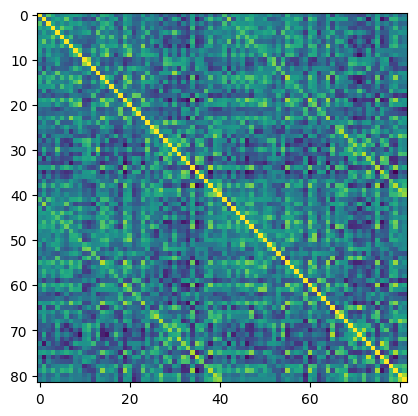

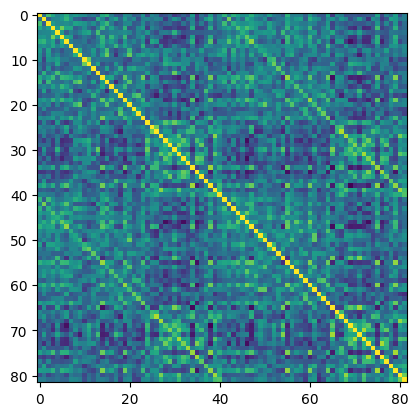

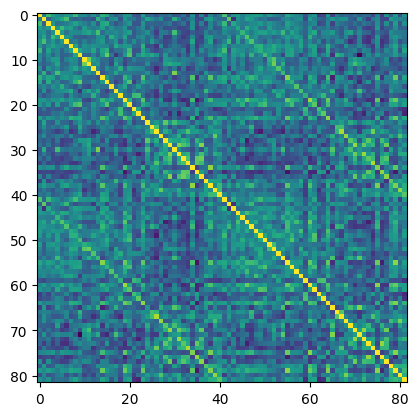

In [62]:
for id in id_sessions_sevoflurane2:
    accu = np.corrcoef(np.swapaxes(timeseries[id,:,:],0,1))
    plt.imshow(accu)
    plt.show()

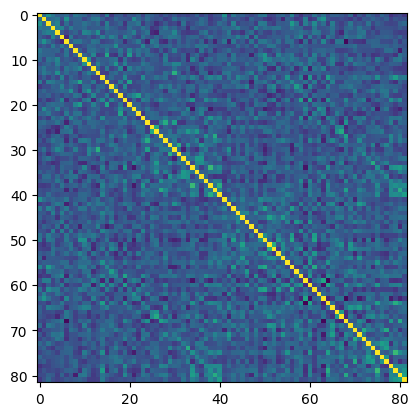

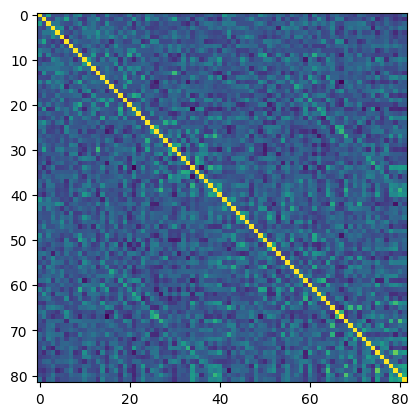

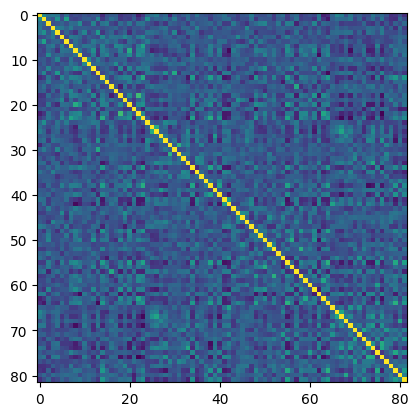

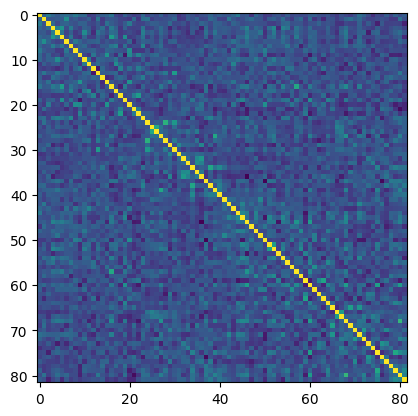

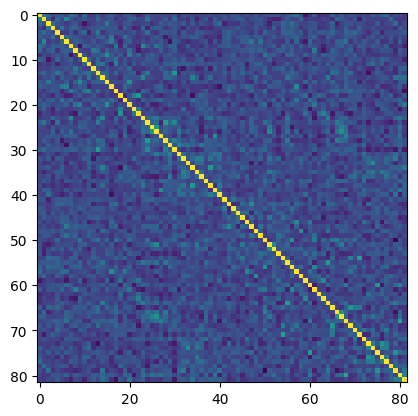

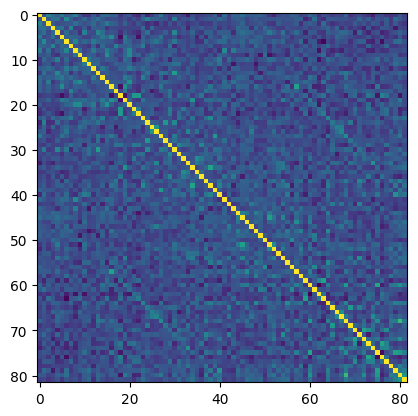

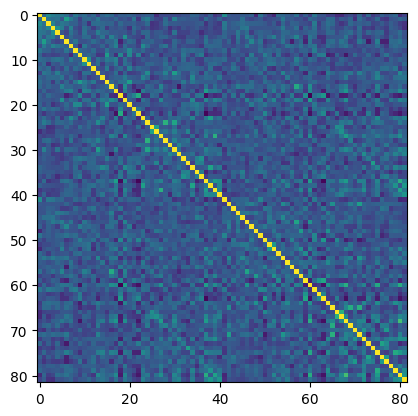

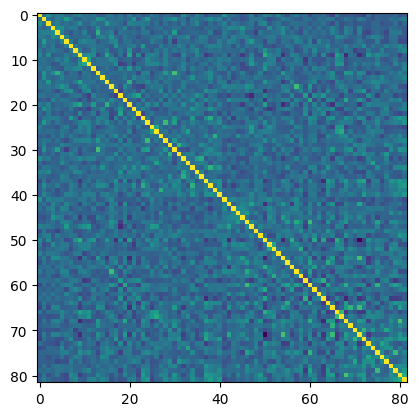

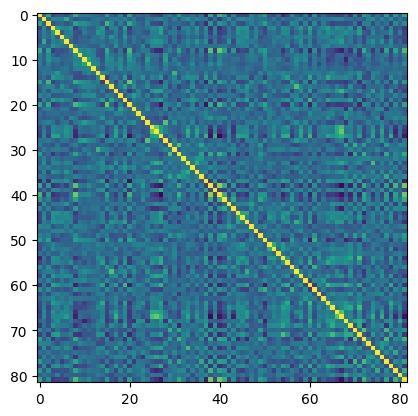

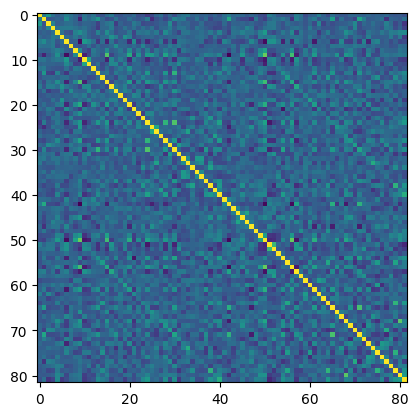

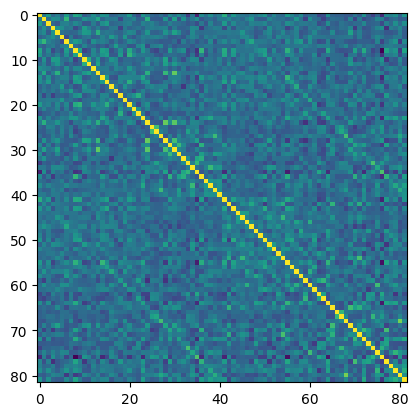

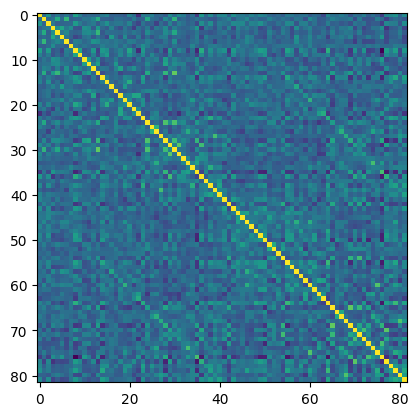

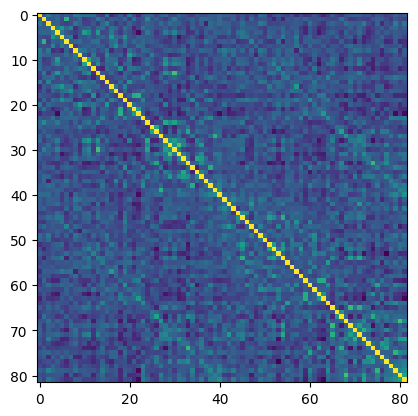

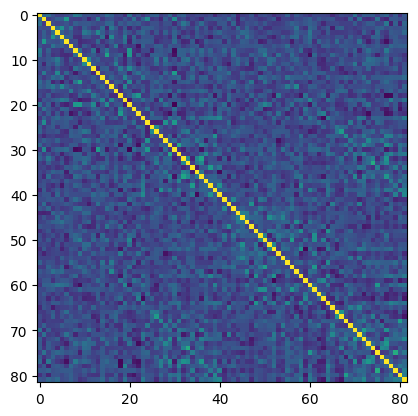

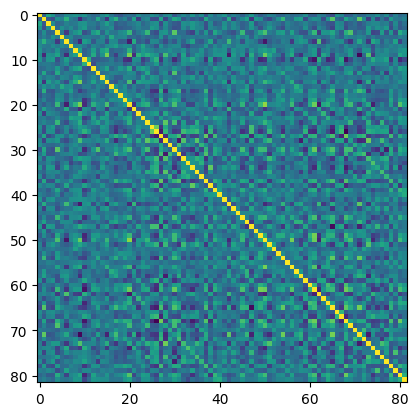

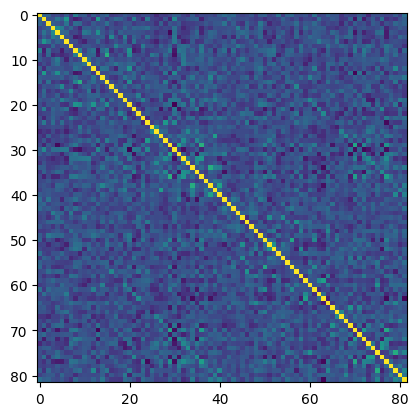

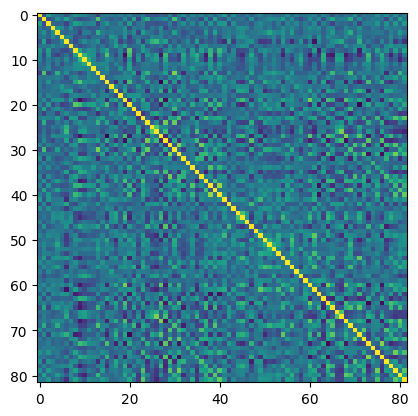

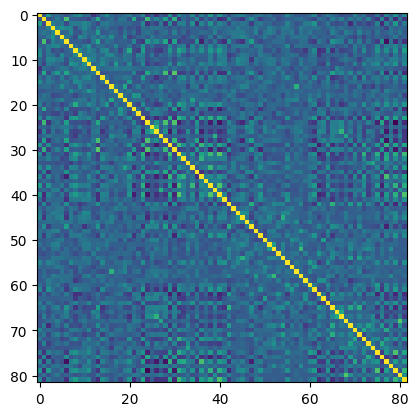

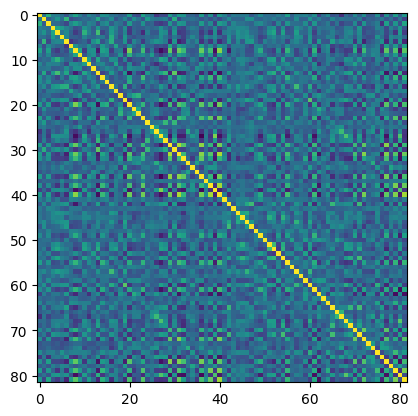

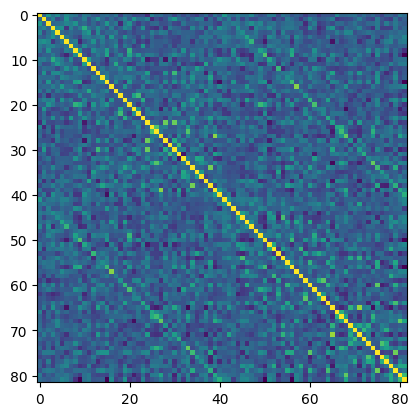

In [63]:
for id in id_sessions_sevoflurane4:
    accu = np.corrcoef(np.swapaxes(timeseries[id,:,:],0,1))
    plt.imshow(accu)
    plt.show()

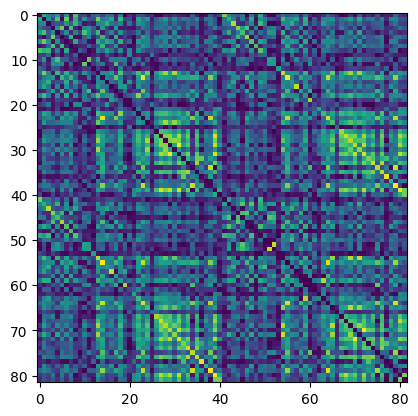

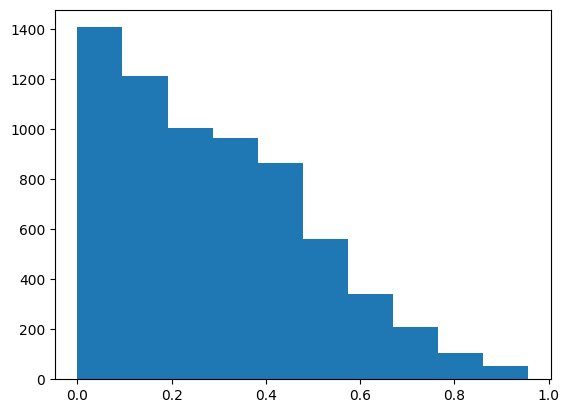

In [15]:
timeseries_awake_all = np.swapaxes(np.swapaxes(timeseries[id_sessions_awake,:,:],1,2),0,1).reshape(82,-1)
dfc_awake = np.abs(np.corrcoef(timeseries_awake_all))
np.fill_diagonal(dfc_awake,0)
plt.imshow(dfc_awake)
plt.show()
plt.hist(dfc_awake.flatten())
plt.show()

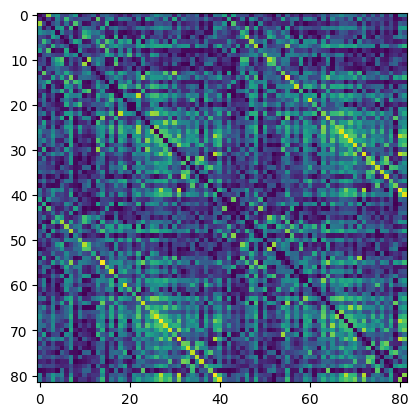

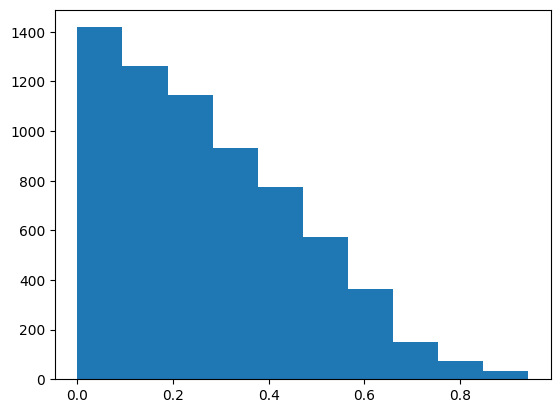

In [17]:
timeseries_light_propofol_all = np.swapaxes(np.swapaxes(timeseries[id_sessions_light_propofol,:,:],1,2),0,1).reshape(82,-1)
dfc_light = np.abs(np.corrcoef(timeseries_light_propofol_all))
np.fill_diagonal(dfc_light,0)
plt.imshow(dfc_light)
plt.show()
plt.hist(dfc_light.flatten())
plt.show()

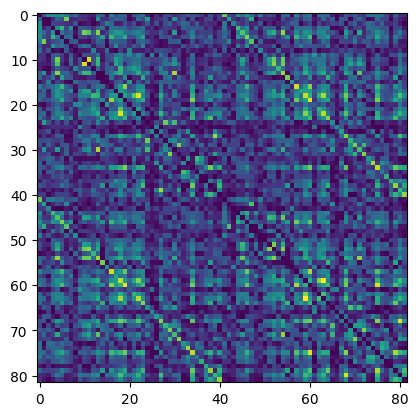

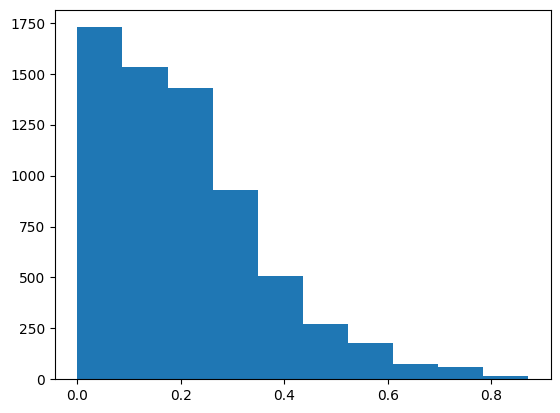

In [18]:
timeseries_deep_propofol_all = np.swapaxes(np.swapaxes(timeseries[id_sessions_deep_propofol,:,:],1,2),0,1).reshape(82,-1)
dfc_deep = np.abs(np.corrcoef(timeseries_deep_propofol_all))
np.fill_diagonal(dfc_deep,0)
plt.imshow(dfc_deep)
plt.show()
plt.hist(dfc_deep.flatten())
plt.show()

In [109]:
timeseries_deep_propofol_all_test.shape

(82, 4000)

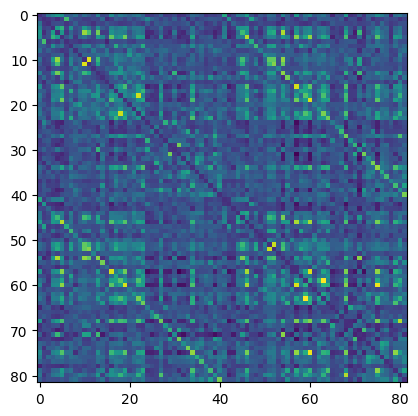

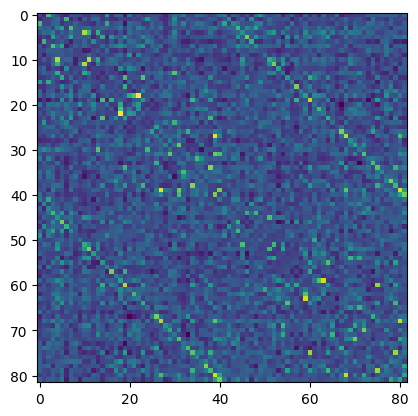

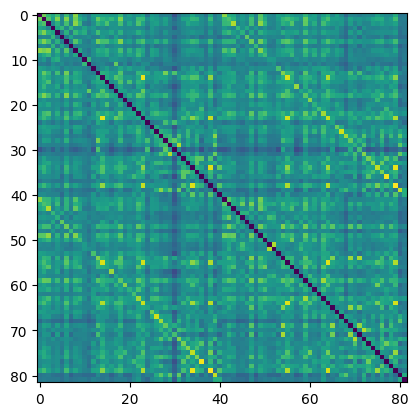

In [116]:
C = np.corrcoef(np.abs(timeseries_deep_propofol_all_test))
np.fill_diagonal(C,0)
plt.imshow(C)
plt.show()

C = np.corrcoef(np.abs(timeseries_light_propofol_all_test))
np.fill_diagonal(C,0)
plt.imshow(C)
plt.show()

C = np.corrcoef(np.abs(timeseries_awake_all_test))
np.fill_diagonal(C,0)
plt.imshow(C)
plt.show()